Este proyecto consiste en realizar un análisis exploratorio a una base de datos que cuenta la librería Seaborn sobre pinguinos y sus distintas características

Importamos librerias a ocupar en el proyecto

In [5]:
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
import ssl

Cargamos los datos

In [10]:
ssl._create_default_https_context = ssl._create_unverified_context
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


1. Realizamos la primera estapa que es conocer y validar nuestros datos

Identificamos el tipo de dato que posee cada variable

In [11]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Contamos cuantas variables hay por cada tipo de dato

In [12]:
df.dtypes.value_counts()

float64    4
object     3
dtype: int64

Vemos cuantas filas y columnas tiene el Dataframe

In [14]:
df.shape

(344, 7)

Vemos si existen columnas con valores nulos 

In [15]:
df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

Vemos cuantos valores nulos hay por columnas

In [16]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Sumamos el total de valores nulos 

In [17]:
df.isnull().sum().sum()

19

Graficamos la proporcion de valores nulos por cada variable

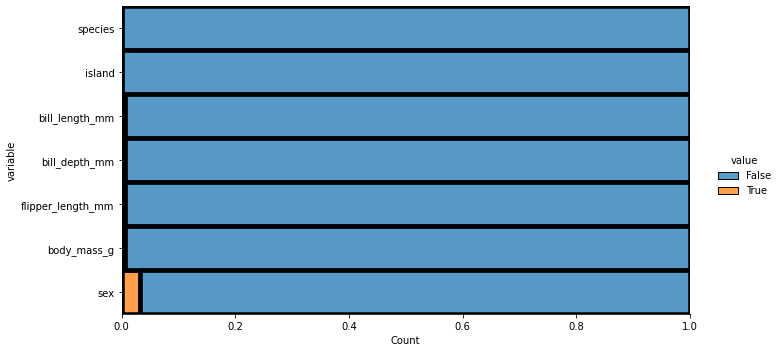

In [20]:
df.isnull().melt().pipe(
    lambda df:(
        sns.displot(
            data=df,
            y='variable',
            hue='value',
            multiple='fill',
            aspect=2
        )
    )
)

Ahora lo vemos por cada pinguino, para ver si quizás es un solo pinguino el que tiene mayores valores nulos

<AxesSubplot:>

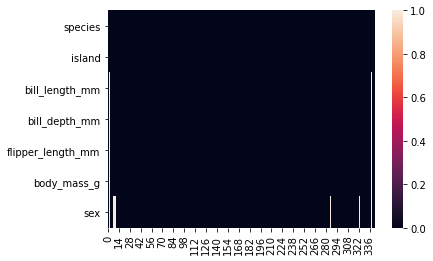

In [21]:
df.isnull().transpose().pipe(
    lambda df:(
        sns.heatmap(
            data=df
        )
    )
)

Como son pocos los valores nulos en este caso lo mejor es eliminar esos valores

In [23]:
df_limpio = df.dropna()
df_limpio.isnull().sum()


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

2. Exploramos nuestras variables categóricas